In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

Using TensorFlow backend.


In [2]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(133,activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_4 (Dense)              (None, 133)               68229     
Total params: 47,144,621
Trainable params: 47,090,093
Non-trainable params: 54,528
_________________________________________________________________


In [6]:
conv_base.trainable = False

In [7]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './dogImages'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


In [10]:
from keras.callbacks import ModelCheckpoint 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='dogsImages.pretrained.augmentation.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=334,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=42, 
      callbacks=[checkpointer], 
      verbose=2)


Epoch 1/10
 - 314s - loss: 2.1192 - acc: 0.4789 - val_loss: 1.9958 - val_acc: 0.6263

Epoch 00001: val_loss improved from inf to 1.99578, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 2/10
 - 306s - loss: 2.0907 - acc: 0.4769 - val_loss: 2.0520 - val_acc: 0.6395

Epoch 00002: val_loss did not improve from 1.99578
Epoch 3/10
 - 311s - loss: 2.0546 - acc: 0.4912 - val_loss: 2.0798 - val_acc: 0.6551

Epoch 00003: val_loss did not improve from 1.99578
Epoch 4/10
 - 306s - loss: 2.0170 - acc: 0.5090 - val_loss: 2.0318 - val_acc: 0.6395

Epoch 00004: val_loss did not improve from 1.99578
Epoch 5/10
 - 331s - loss: 1.9317 - acc: 0.5160 - val_loss: 2.0676 - val_acc: 0.6539

Epoch 00005: val_loss did not improve from 1.99578
Epoch 6/10
 - 309s - loss: 1.9595 - acc: 0.5148 - val_loss: 2.0326 - val_acc: 0.6527

Epoch 00006: val_loss did not improve from 1.99578
Epoch 7/10
 - 309s - loss: 1.9409 - acc: 0.5156 - val_loss: 1.9975 - val_acc: 0.6455

Epoch 00007: val

In [9]:
model.load_weights('dogsImages.pretrained.augmentation.model.weights.best.hdf5')

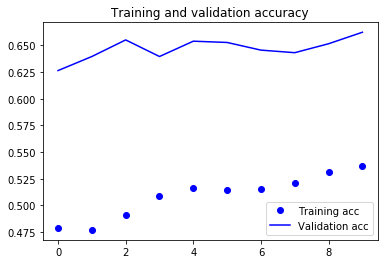

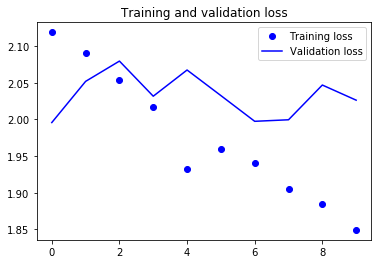

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test_acc:",test_acc)

Found 836 images belonging to 133 classes.
test_acc: 0.6184738971382738
